In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker

In [3]:
df = pd.read_csv("arma.log",names=['k','init','model','l','i'])
mdf2 = df.groupby(['init','model','k']).mean()
sdf2 = df.groupby(['init','model','k']).std()
mdf = df.groupby(['init','model','k']).mean()
sdf = df.groupby(['init','model','k']).std()

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3099: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  self.set_xlim(upper, lower, auto=None)
/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
No handles with labels found to put in legend.


Text(0.5, 0.98, 'Different Decimation Methods')

/Users/lkeselma/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


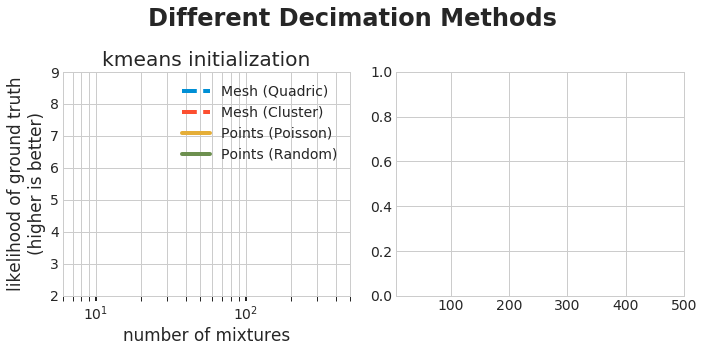

In [5]:
pltstuff = 1

fig = plt.figure(figsize=(10,pltstuff*5))
from matplotlib import rc
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-whitegrid')
if pltstuff == 2:
    subplot_order = [1,3,2,4]
else:
    subplot_order = [1,2]
#plt.rcParams["font.family"] = "sans-serif"
rc('font',**{'family':'sans-serif','sans-serif':['cm']})
#plt.style.use('default')
for ii, init in enumerate(['kmeans']):
    for model in range(4):
        ls = '--' if model < 2 else '-'
        if model == 0:
            label = 'Mesh (Quadric)'
        if model == 1:
            label = 'Mesh (Cluster)'
        if model == 2:
            label = 'Points (Poisson)'
        if model == 3:
            label = 'Points (Random)'
        if init == 'kmeans':
            x = np.array(mdf2.loc[('kmeans',0),].index)
            y = mdf2.loc[(init,model),].values[:,0]
            error = sdf2.loc[(init,model),].values[:,0]
        else:
            x = np.array(mdf.loc[('random',0),].index)

            y = mdf.loc[(init,model),].values[:,0]
            error = sdf.loc[(init,model),].values[:,0]

        ax = plt.subplot(pltstuff,2,subplot_order[pltstuff*ii])
        #print(x.shape,y.shape)

        plt.plot(x,y,ls=ls,label=label)
        plt.fill_between(x, y-error, y+error,alpha=0.3)
        plt.grid(True)
        plt.xlabel('number of mixtures')
        plt.title('{} init. fidelity'.format(init))
        plt.title('{} initialization'.format(init))

        plt.ylabel('likelihood of ground truth\n(higher is better)')
        plt.ylim(2,9)
        ax.set_xscale("log", nonposx='clip')
        ax.tick_params(axis='x', which='minor', bottom=True,width=1,length=5)   
        plt.grid(True,axis='x',which='minor')
        ax.tick_params(axis='x', which='major', bottom=True,width=2,length=5)   

        if pltstuff == 2:
            if init == 'kmeans':
                y = mdf2.loc[(init,model),].values[:,1]
                error = sdf2.loc[(init,model),].values[:,1]
            else:
                #x = np.array(mdf.loc[('random',0),].index)

                #x = np.array(mdf.index)
                y = mdf.loc[(init,model),].values[:,1]
                error = sdf.loc[(init,model),].values[:,1]
            ax = plt.subplot(pltstuff,2,subplot_order[1+ii*2])
            print(x.shape,y.shape)
            plt.plot(x,y,ls=ls,label=label)
            plt.fill_between(x, y-error, y+error,alpha=0.15)

            ax.set_xscale("log", nonposx='clip')
            plt.grid(True)
            plt.xlabel('number of mixtures')
            plt.title('{} init. runtime'.format(init))
            plt.ylabel('iterations until convergence')
            ax.tick_params(axis='x', which='minor', bottom=True,width=1,length=5)   
            plt.grid(True,axis='x',which='minor')
            ax.tick_params(axis='x', which='major', bottom=True,width=2,length=5)   

for i in range(2*pltstuff):
    plt.subplot(pltstuff,2,1+i)
    plt.legend()
    plt.xlim(6,500)


fig.tight_layout()
fig.subplots_adjust(top=0.7+pltstuff*0.1)

plt.suptitle('Different Decimation Methods',size=24,weight='bold')
#plt.savefig('graphs-qc.pdf', facecolor=fig.get_facecolor(), edgecolor='none')


In [16]:
mdf2.loc[('kmeans',0),].values, np.array(mdf2.loc[('kmeans',0),].index)

(array([[ 6.35699818, 74.5       ],
        [ 6.781109  , 55.7       ],
        [ 7.23494883, 50.8       ],
        [ 7.5525577 , 40.2       ],
        [ 7.85669842, 30.3       ],
        [ 8.13364823, 30.9       ],
        [ 8.34859027, 31.7       ]]),
 array([  6,  12,  25,  50, 100, 200, 400]))

In [17]:
mdf2,mdf

(                         l      i
 init   model k                   
 kmeans 0     6    6.356998   74.5
              12   6.781109   55.7
              25   7.234949   50.8
              50   7.552558   40.2
              100  7.856698   30.3
              200  8.133648   30.9
              400  8.348590   31.7
        1     6    6.351375   76.5
              12   6.800988   63.6
              25   7.181331   48.5
              50   7.474414   30.1
              100  7.704474   16.8
              200  7.860191   28.9
              400  7.918776   16.9
        2     6    6.516804  100.0
              12   7.041857  100.0
              25   7.478757  100.0
              50   7.840358  100.0
              100  8.164890  100.0
              200  8.229011  100.0
              400  7.834389  100.0
        3     6    6.464061  100.0
              12   6.965008  100.0
              25   7.301492  100.0
              50   7.456853  100.0
              100  7.393128  100.0
              200  6